Best k by silhouette score: 6
KMeans: Silhouette = 0.431, Davies–Bouldin = 0.835
DBSCAN: Silhouette = 0.188, Davies–Bouldin = 2.480
Hierarchical: Silhouette = 0.420, Davies–Bouldin = 0.852


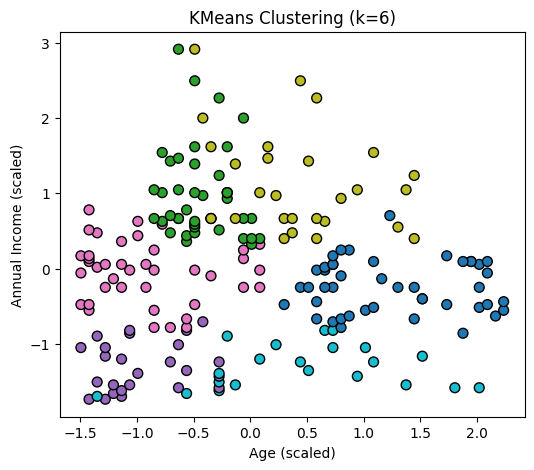

In [5]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# 3.1 Load Data (from local file)
file_path = 'Mall_Customers.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(
        f"Dataset not found at {file_path}. "
        "Please download 'Mall_Customers.csv' into your working directory."
    )

mall = pd.read_csv(file_path)

# 3.2 Preprocessing
X = mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3.3 Algorithms to compare

# 3.3.1 K-Means: find best k with silhouette
sil_scores = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

best_k = sil_scores.index(max(sil_scores)) + 2
print(f"Best k by silhouette score: {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=42).fit(X_scaled)
labels_km = kmeans.labels_

# 3.3.2 DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5).fit(X_scaled)
labels_db = dbscan.labels_

# 3.3.3 Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=best_k, linkage='ward').fit(X_scaled)
labels_hc = hc.labels_

# 3.4 Evaluation
for name, labels in [
    ('KMeans', labels_km),
    ('DBSCAN', labels_db),
    ('Hierarchical', labels_hc)
]:
    sil = silhouette_score(X_scaled, labels)
    dbi = davies_bouldin_score(X_scaled, labels)
    print(f"{name}: Silhouette = {sil:.3f}, Davies–Bouldin = {dbi:.3f}")

# 3.5 Plot KMeans clusters
plt.figure(figsize=(6, 5))
plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=labels_km, cmap='tab10', s=50, edgecolor='k'
)
plt.title(f'KMeans Clustering (k={best_k})')
plt.xlabel('Age (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.show()
